In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import numpy as np
import pandas as pd

In [77]:
filelist = ['predictions_NN/%s' % s for s in os.listdir('predictions_NN/')]

target_names = ['AMPA', 'CDK', 'Ca2', 'Cdc25', 'DNAMetabolism',
 'DNA_intercalation', 'EGFR', 'MEK', 'ROCK', 'TopoII', 'Tubulin',
 'adrenoceptor', 'cMyc', 'cellcycle', 'dopaminereceptor', 'eNOS', 'rac1']

column_names = np.append('cell_code', np.sort(target_names))

In [11]:
main_probabilities = pd.DataFrame(columns=column_names)
df = pd.read_csv(filelist[0])[column_names].sort_values(by='cell_code').reset_index(drop=True)
main_probabilities['cell_code'] = df.cell_code
main_probabilities.iloc[:, 1:] = 0

# Sum all the probabilities
for filename in filelist:
    if os.path.isfile(filename):
        df = pd.read_csv(filename)[column_names].sort_values(by='cell_code').reset_index(drop=True)
        main_probabilities.iloc[:, 1:] += df.iloc[:, 1:]

# Average probabilities
main_probabilities.iloc[:, 1:] /= len(filelist)

In [12]:
main_probabilities.head()

,cell_code,AMPA,CDK,Ca2,Cdc25,DNAMetabolism,DNA_intercalation,EGFR,MEK,ROCK,TopoII,Tubulin,adrenoceptor,cMyc,cellcycle,dopaminereceptor,eNOS,rac1
0,000UdopVPb,0.0993014,0.0936469,0.000788449,0.000345013,0.0214969,0.159222,0.103789,0.0797466,0.0472368,0.0342686,0.0211099,0.108586,0.0325635,0.0707893,0.116864,0.000291382,5.32926e-05
1,00SjHgMANS,0.115324,0.0529171,0.000121651,8.67922e-05,0.0354776,0.110903,0.169021,0.0164879,0.123157,0.0279,0.0263184,0.0853786,0.040086,0.0835335,0.103286,9.71982e-05,3.54167e-06
2,00hT05IdJA,0.119882,0.0412348,7.41325e-05,5.61778e-05,0.0302813,0.0942359,0.175072,0.00585017,0.159236,0.0241563,0.0243711,0.0858395,0.0414799,0.0792757,0.109036,1.76576e-05,1.48839e-06
3,01FX1FB6h8,0.000667069,0.000581486,0.00961849,0.0081076,0.011307,0.000266463,0.000790271,0.00108317,0.000581299,0.0139143,0.0553302,0.000250168,0.000300316,0.000319281,0.000576554,0.0138308,0.872575
4,01K2SS79u1,0.127303,0.0345557,1.92722e-05,9.52428e-06,0.0316428,0.104765,0.185115,0.00548588,0.152666,0.0326136,0.0253556,0.090574,0.0351082,0.077526,0.0873466,6.49988e-06,6.66471e-06


In [13]:
main_predictions = pd.DataFrame(columns=['cell_code', 'prediction'])
main_predictions['cell_code'] = main_probabilities['cell_code']

for i in range(len(main_probabilities)):
    target_prediction = target_names[np.argmax(main_probabilities.iloc[i ,1:].values)]
    main_predictions.iloc[i, 1] = target_prediction

In [14]:
main_predictions.to_csv('ensemble100_NN_predictions.csv', index=False)

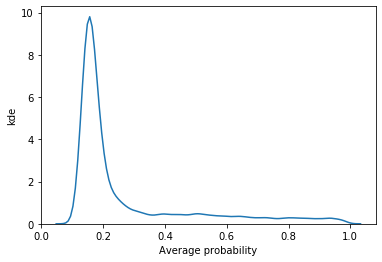

In [27]:
max_probabilities = np.max(main_probabilities.iloc[:,1:], axis=1).values
sns.kdeplot(max_probabilities)
plt.xlabel('Average probability')
plt.ylabel('kde')
plt.savefig('Predictions_ensemble_100_probability_distributions.png')

In [42]:
# Set all the probabilities < threshold to zero
threshold = 0.2

main_probabilities = pd.DataFrame(columns=column_names)
df = pd.read_csv(filelist[0])[column_names].sort_values(by='cell_code').reset_index(drop=True)
main_probabilities['cell_code'] = df.cell_code
main_probabilities.iloc[:, 1:] = 0

# Sum all the probabilities
for filename in filelist:
    if os.path.isfile(filename):
        df = pd.read_csv(filename)[column_names].sort_values(by='cell_code').reset_index(drop=True)
        df_values = df.iloc[:, 1:].values
        df_values[df_values < threshold] = 0
        main_probabilities.iloc[:, 1:] += df_values


main_predictions = pd.DataFrame(columns=['cell_code', 'prediction'])
main_predictions['cell_code'] = main_probabilities['cell_code']

for i in range(len(main_probabilities)):
    target_prediction = target_names[np.argmax(main_probabilities.iloc[i ,1:].values)]
    main_predictions.iloc[i, 1] = target_prediction
    
main_predictions.to_csv('Predictions_ensemble_100_NN_thresholded.csv', index=False)

In [43]:
valid_metadata_df = pd.read_csv('validation_metadata.csv')

In [44]:
valid_metadata_df.head()

,rel_path,cell_code
0,single_cell_KuQJTlfiFW.tiff,KuQJTlfiFW
1,single_cell_OHLCBK5YUr.tiff,OHLCBK5YUr
2,single_cell_hdDTiJ9PFF.tiff,hdDTiJ9PFF
3,single_cell_UZtW0gA3q5.tiff,UZtW0gA3q5
4,single_cell_IAKfYa4KWb.tiff,IAKfYa4KWb


In [ ]:
# Use well info

In [180]:
filelist = ['predictions_NN/%s' % s for s in os.listdir('predictions_NN/')]

target_names = ['AMPA', 'CDK', 'Ca2', 'Cdc25', 'DNAMetabolism',
 'DNA_intercalation', 'EGFR', 'MEK', 'ROCK', 'TopoII', 'Tubulin',
 'adrenoceptor', 'cMyc', 'cellcycle', 'dopaminereceptor', 'eNOS', 'rac1']

column_names = np.append('cell_code', np.sort(target_names))

In [181]:
len(filelist)

175

In [182]:
valid_feat_df = pd.read_csv('feature_data/validation_feature_select_robust.csv')[['well_code', 'cell_code']]

In [183]:
valid_feat_df.head()

,well_code,cell_code
0,Ros6NxC0kA,Hmv43N53kD
1,Ros6NxC0kA,B8kmJi71Zt
2,Ros6NxC0kA,lcvffs6oty
3,Ros6NxC0kA,jVHzZ1tdUT
4,Ros6NxC0kA,Bcx0AaJQ49


In [184]:
unique_wells = valid_feat_df.well_code.unique()

In [185]:
# Threshold
threshold = 0.9

main_probabilities = pd.DataFrame(columns=column_names)
df = pd.read_csv(filelist[0])[column_names].sort_values(by='cell_code').reset_index(drop=True)
main_probabilities['cell_code'] = df.cell_code
main_probabilities.iloc[:, 1:] = 0

# Sum all the probabilities
for filename in filelist:
    if os.path.isfile(filename):
        df = pd.read_csv(filename)[column_names].sort_values(by='cell_code').reset_index(drop=True)
        df_values = df.iloc[:, 1:].values
        df_values[df_values < threshold] = 0
        main_probabilities.iloc[:, 1:] += df_values

In [186]:
main_probabilities.head()

,cell_code,AMPA,CDK,Ca2,Cdc25,DNAMetabolism,DNA_intercalation,EGFR,MEK,ROCK,TopoII,Tubulin,adrenoceptor,cMyc,cellcycle,dopaminereceptor,eNOS,rac1
0,000UdopVPb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00SjHgMANS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00hT05IdJA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01FX1FB6h8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.216
4,01K2SS79u1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
cell_codes = []
target_preds = []
for well in unique_wells:
    well_cells = valid_feat_df[valid_feat_df.well_code == well].cell_code.values
    target_pred = np.argmax(df[df.cell_code.isin(well_cells)].iloc[:, 1:].sum())
    
    for c in well_cells:
        cell_codes.append(c)
        target_preds.append(target_pred)

In [188]:
WELL_PRED = pd.DataFrame(columns=['cell_code', 'prediction'])
WELL_PRED['cell_code'] = cell_codes
WELL_PRED['prediction'] = target_preds

In [189]:
WELL_PRED.to_csv('Predictions_ensemble_100_combined_11.csv', index=False)